# Introducción a Cartopy y PyGMT en Google Colab

En este notebook, aprenderemos a instalar y usar las bibliotecas `cartopy` y `pygmt` en Google Colab para visualización de datos geoespaciales.

## Instalación de Bibliotecas

Primero, necesitamos instalar `cartopy` y `pygmt`. Sin embargo, dado que Google Colab usa una versión de Python que puede no ser compatible directamente con estas bibliotecas, necesitamos algunas configuraciones adicionales. Usaremos `conda` para instalar estas bibliotecas.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install -c conda-forge cartopy pygmt -y

## Uso de Cartopy

Cartopy es una biblioteca para aplicaciones cartográficas. Aquí hay un ejemplo básico de cómo crear un mapa usando Cartopy.

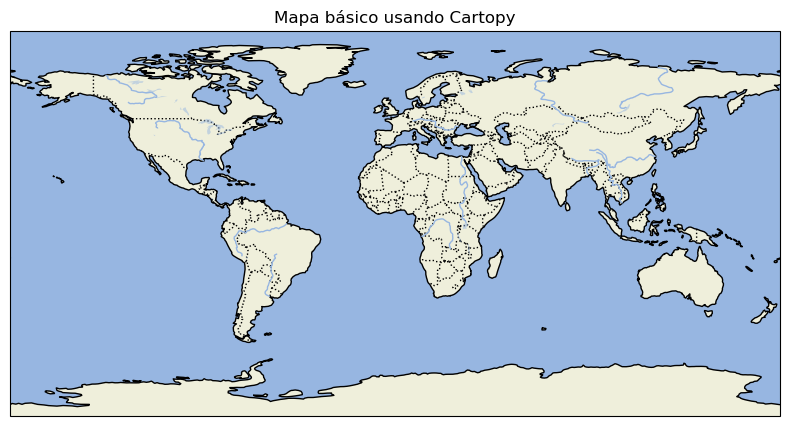

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear una figura y un eje con una proyección específica
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Añadir características al mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Establecer límites del mapa
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Añadir título
plt.title('Mapa básico usando Cartopy')
plt.show()

## Uso de PyGMT

PyGMT es una biblioteca para la creación de gráficos geoespaciales utilizando el motor GMT. Aquí hay un ejemplo básico de cómo crear un mapa usando PyGMT.

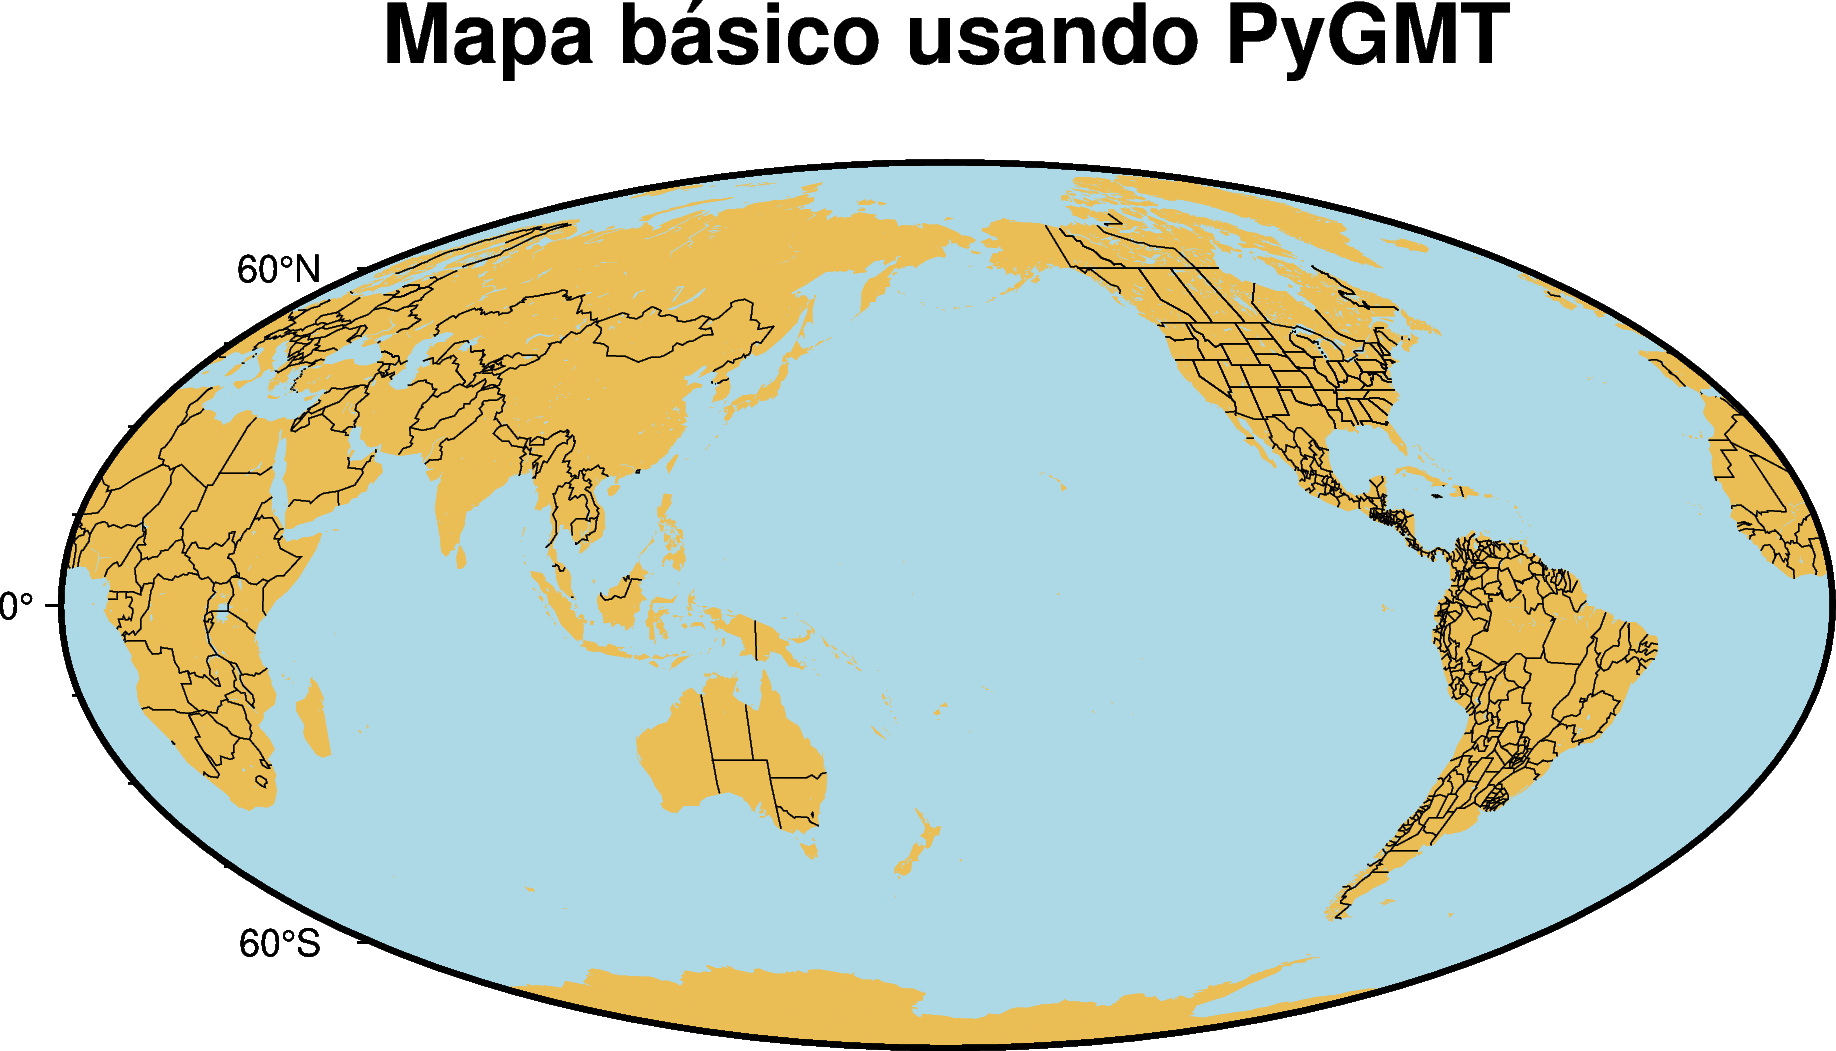

In [5]:
import pygmt

# Crear una figura
fig = pygmt.Figure()

# Crear el mapa base
fig.coast(region='g', projection='W15c', land='lightbrown', water='lightblue', borders=[1, 2], frame=True)

# Añadir título
fig.basemap(frame=['a', '+t"Mapa básico usando PyGMT"'])

# Mostrar el mapa
fig.show()

## Proyecciones Cartográficas

Las proyecciones cartográficas son métodos para representar la superficie curva de la Tierra en una superficie plana. A continuación, se describen algunas de las proyecciones más utilizadas con ejemplos en `cartopy` y `pygmt`.

### Proyección Plate Carree

La proyección Plate Carree es una proyección cilíndrica simple donde las coordenadas de longitud y latitud se usan directamente como coordenadas X e Y. Es útil para mapas globales rápidos.

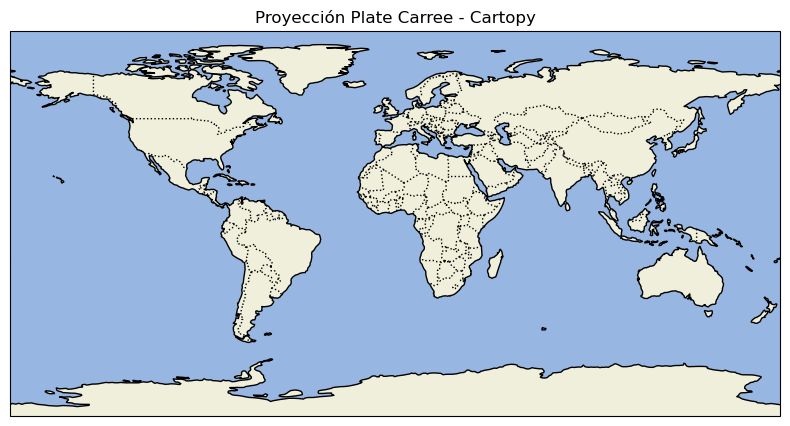

In [6]:
# Ejemplo en Cartopy
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.title('Proyección Plate Carree - Cartopy')
plt.show()

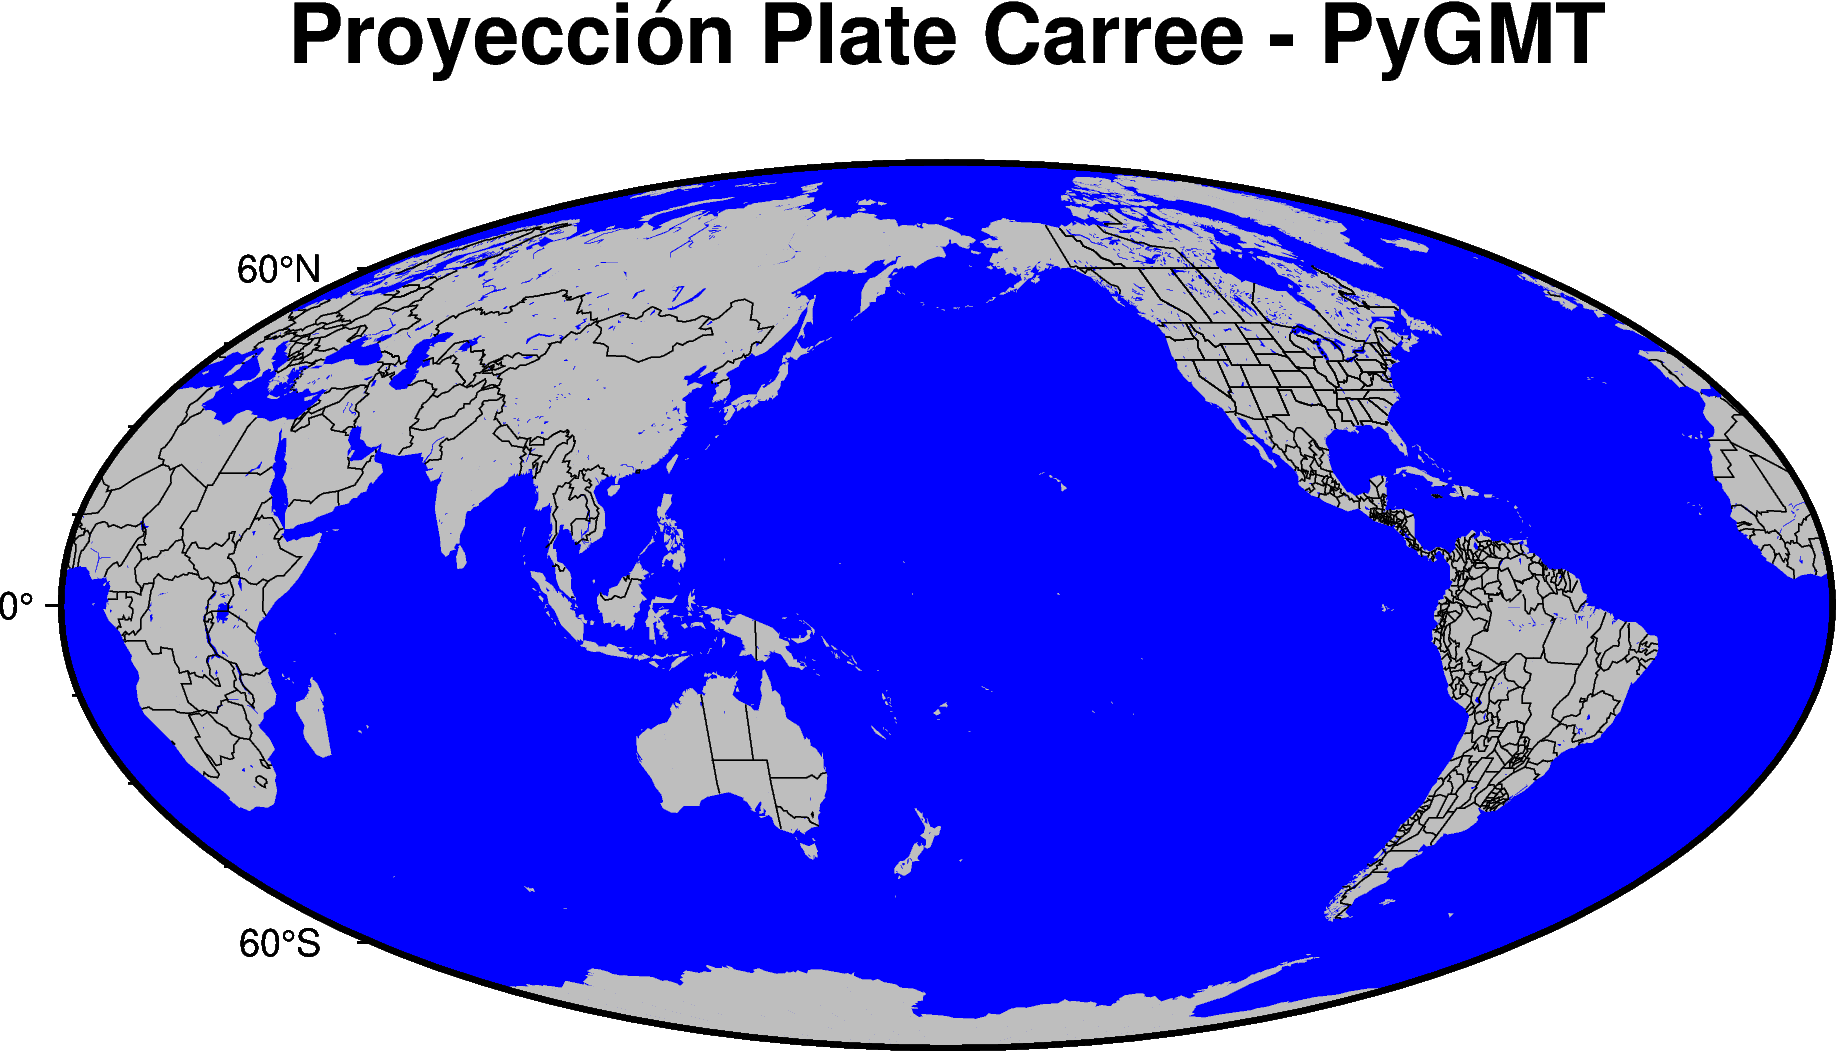

In [7]:
# Ejemplo en PyGMT
fig = pygmt.Figure()
fig.coast(region='g', projection='W15c', land='gray', water='blue', borders=[1, 2], frame=True)
fig.basemap(frame=['a', '+t"Proyección Plate Carree - PyGMT"'])
fig.show()

### Proyección Mercator

La proyección Mercator es una proyección cilíndrica conforme que se utiliza comúnmente para mapas de navegación porque mantiene los ángulos de los meridianos.

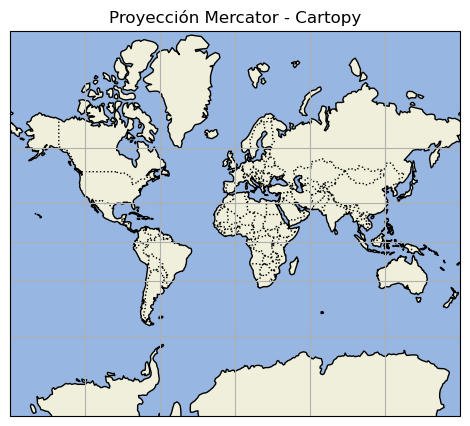

In [28]:
# Ejemplo en Cartopy
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()
plt.title('Proyección Mercator - Cartopy')
plt.show()

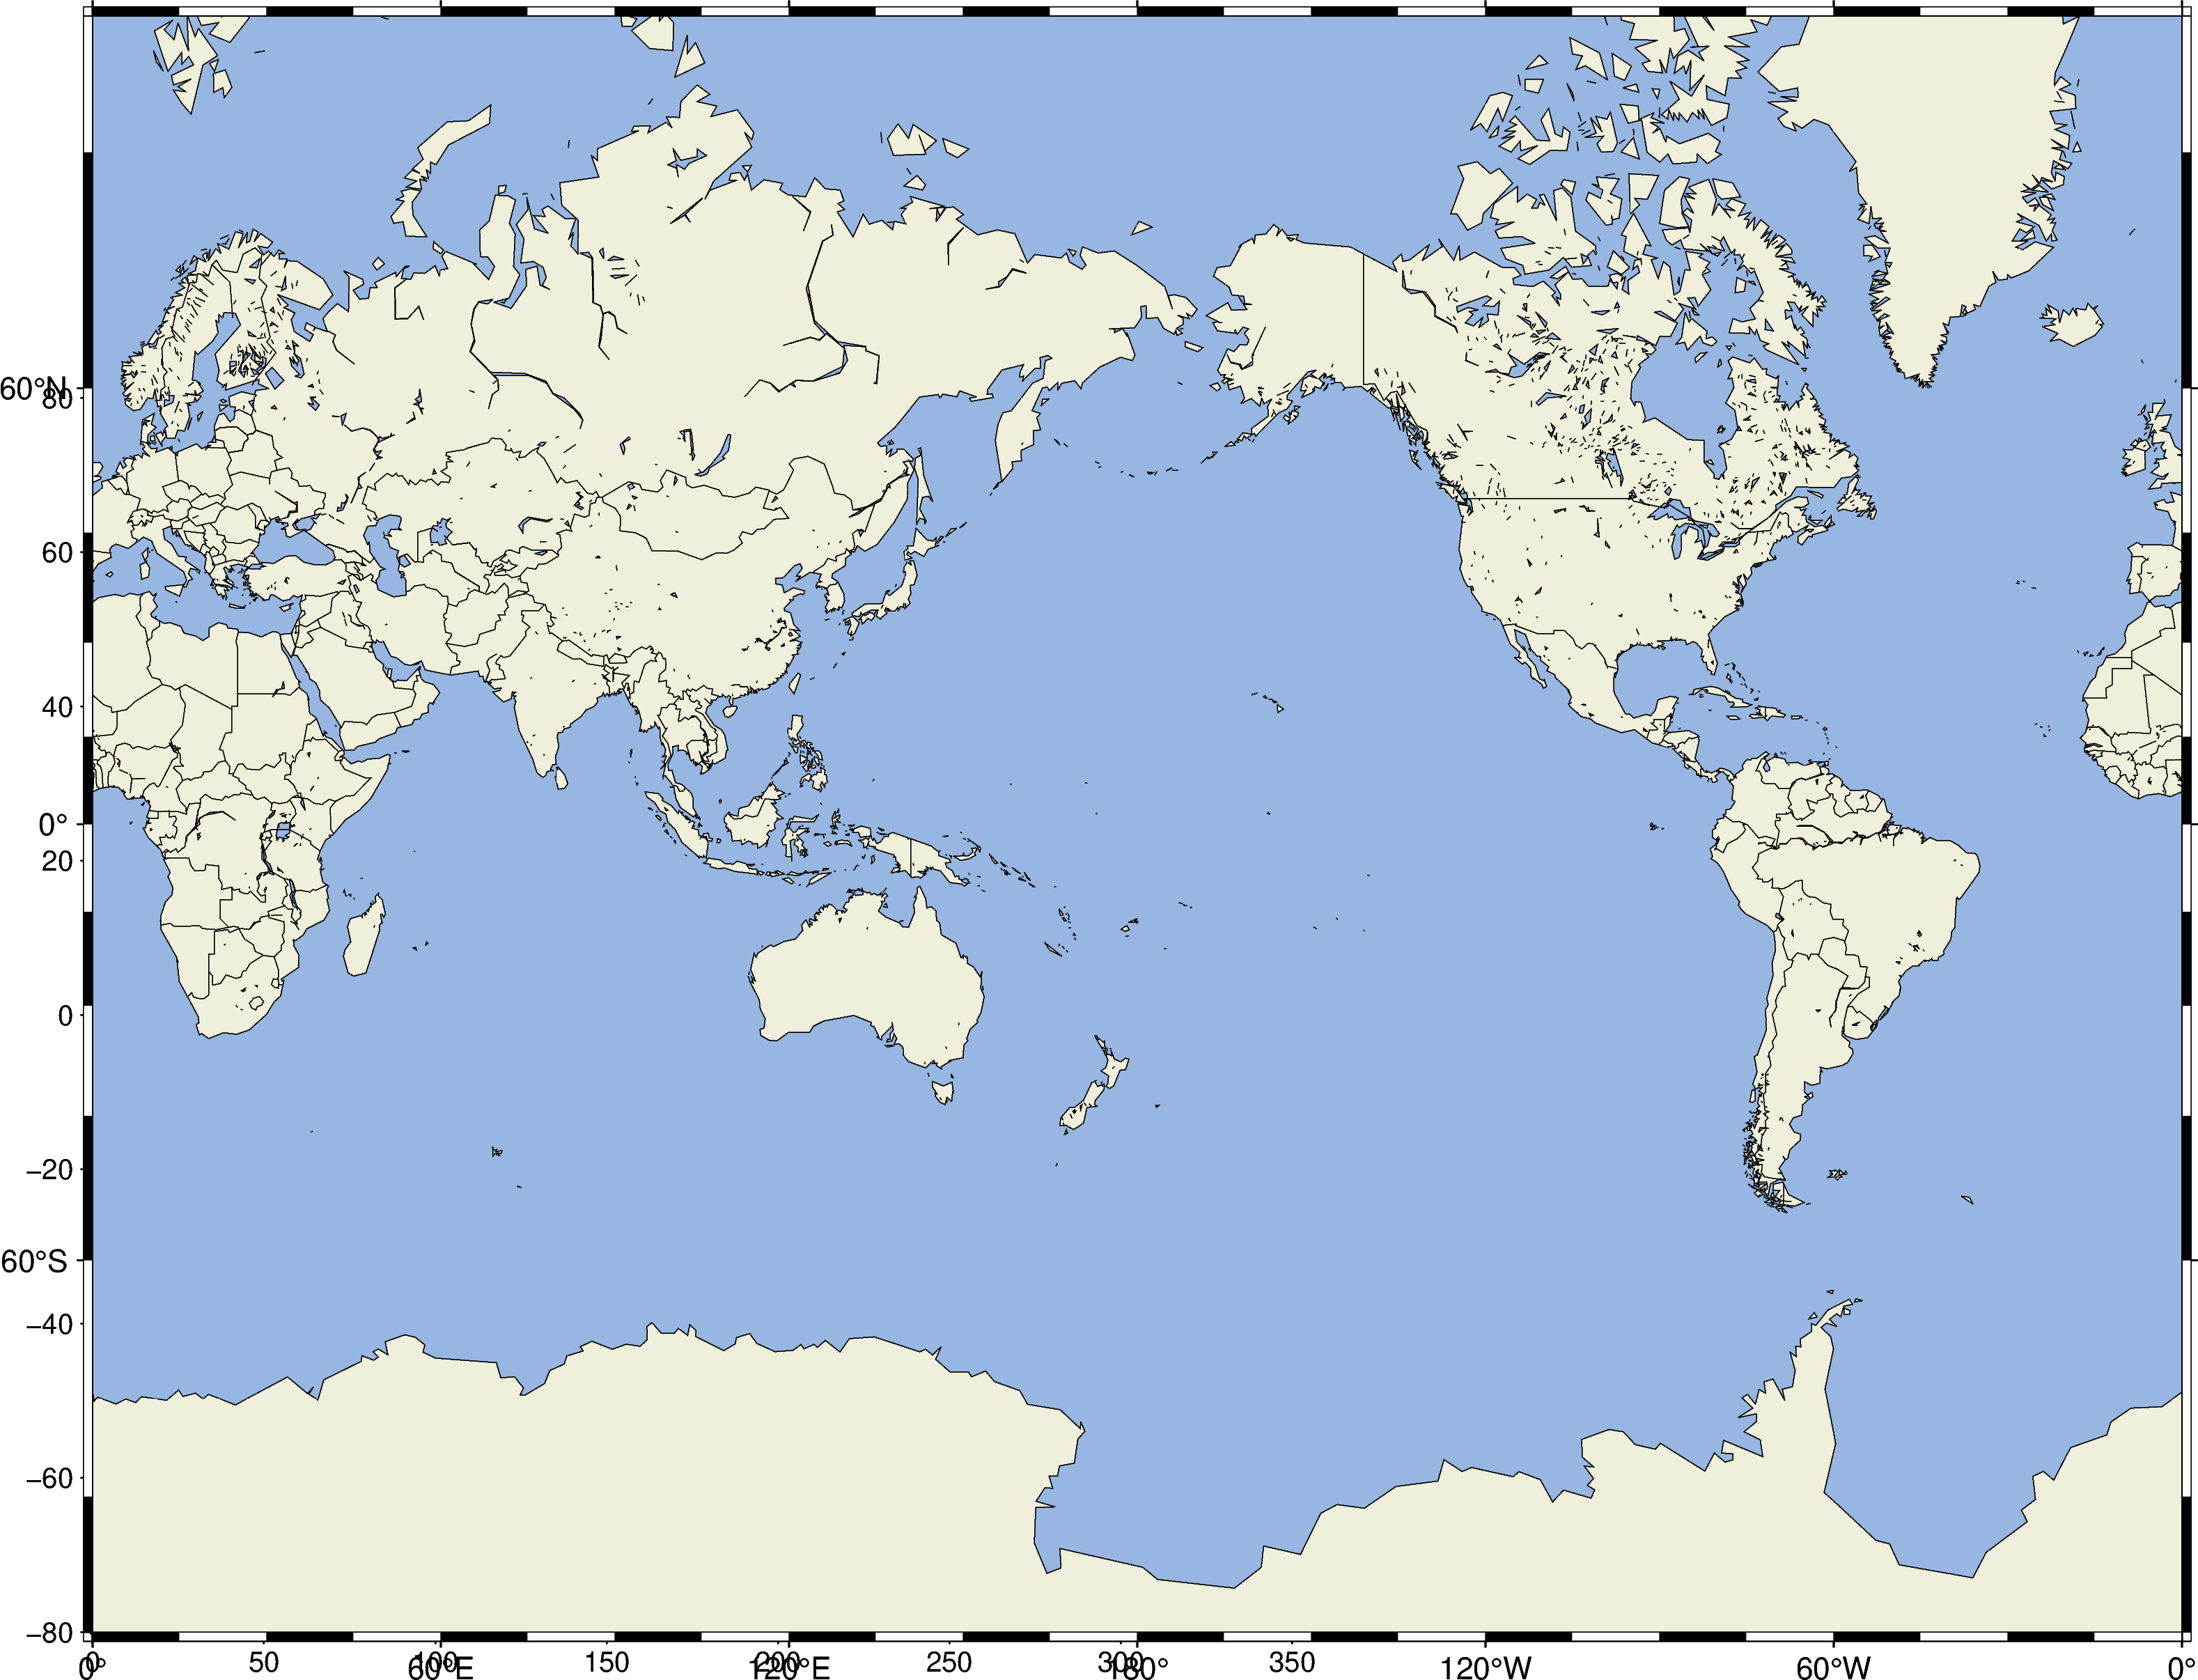

In [25]:
# Ejemplo en PyGMT
custom_colors = {
    'water': '151/182/225', 'land': '239/239/219', 'land_alt1': '219/219/219'
}

# Crear una figura

fig = pygmt.Figure()
fig.basemap(frame=['a', '+t"Proyección Mercator - PyGMT"'],region=[0, 360, -80, 80])
fig.coast(region=[0, 360, -80, 80], projection='M10i',land=custom_colors['land'], water=custom_colors['water'], borders=[1], frame=True,shorelines=True)
fig.show()

### Proyección Robinson

La proyección Robinson es una proyección pseudocilíndrica que intenta encontrar un compromiso visual agradable para representar el mundo.

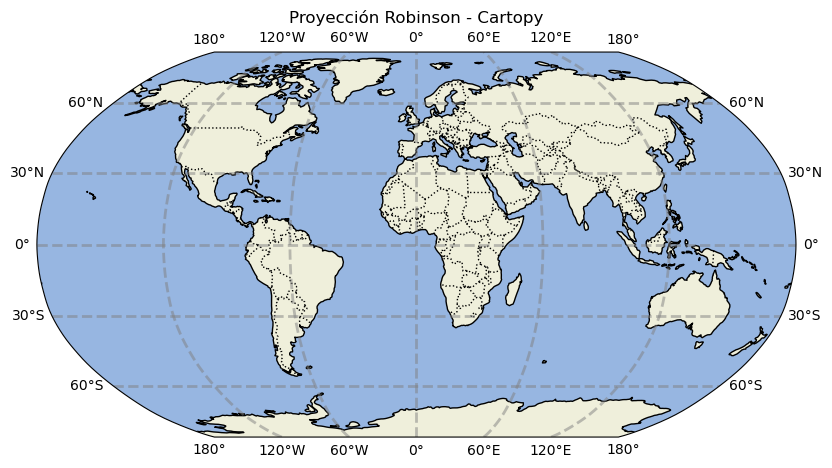

In [31]:
# Ejemplo en Cartopy
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
plt.title('Proyección Robinson - Cartopy')
plt.show()

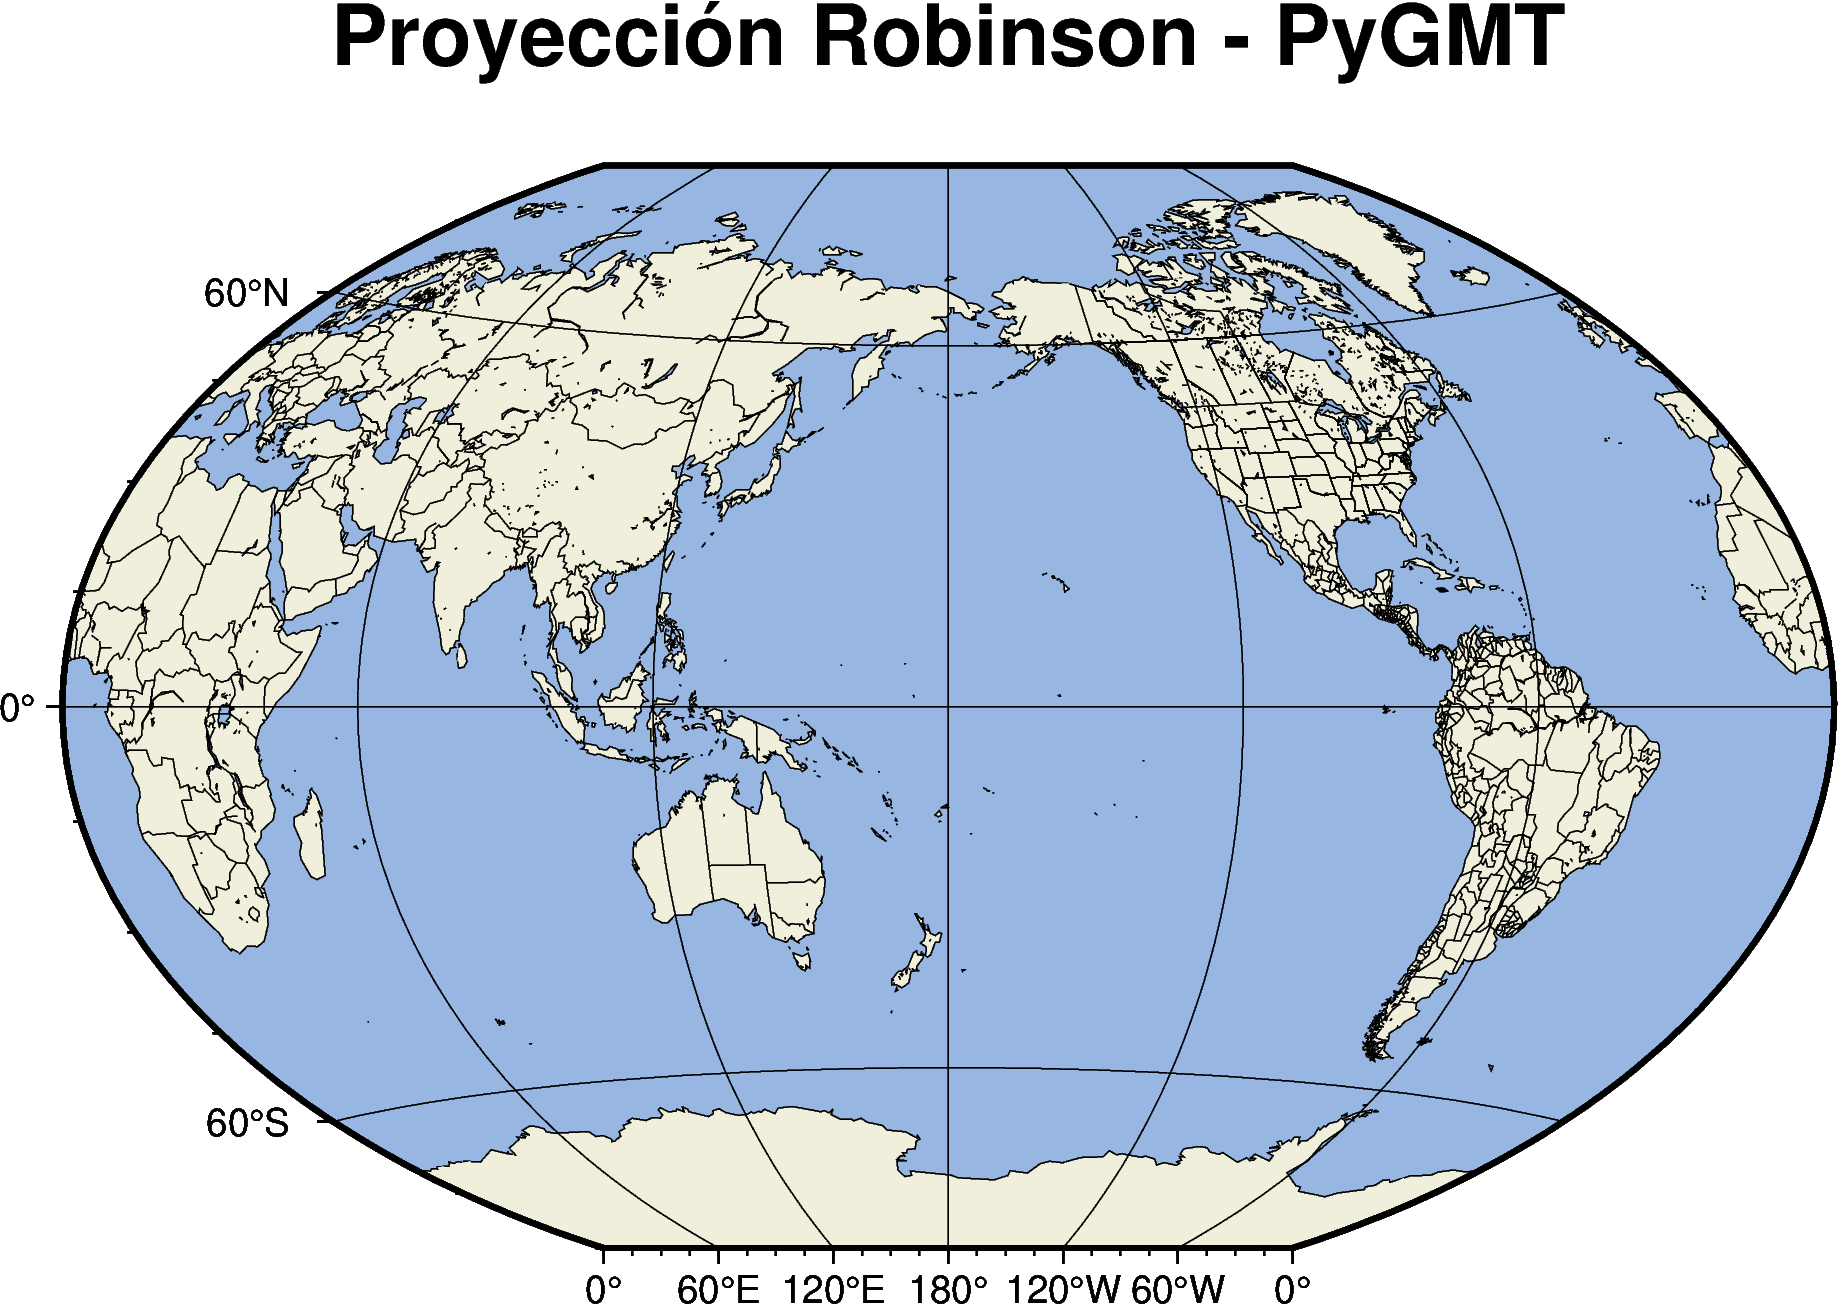

In [34]:
# Ejemplo en PyGMT
fig = pygmt.Figure()
fig.coast(region='g', projection='R15c', land=custom_colors['land'], water=custom_colors['water'], borders=[1, 2], frame=True,shorelines=True)
fig.basemap(frame=['ag', '+t"Proyección Robinson - PyGMT"'])
fig.show()

## Mapas de Chile

En esta sección, crearemos mapas de Chile utilizando `pcolor` en `cartopy` y `grdimage` en `pygmt`.

### Mapa de Chile con pcolor en Cartopy

Usaremos datos de elevación para crear un mapa de Chile utilizando `pcolor` en `cartopy`.

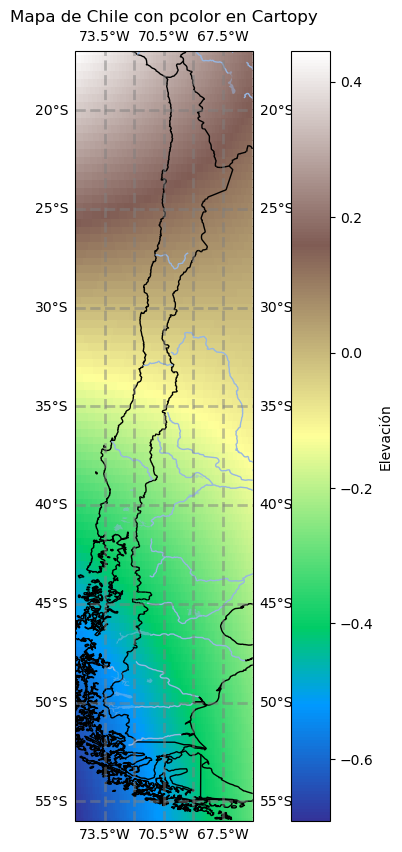

In [44]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

# Generar datos de ejemplo (elevación ficticia)
lon = np.linspace(-75, -66, 100)
lat = np.linspace(-56, -17, 100)
lon, lat = np.meshgrid(lon, lat)
elevacion = np.sin(3 * np.pi * lon / 180) * np.cos(3 * np.pi * lat / 180)

# Crear el mapa
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75, -66, -56, -17], crs=ccrs.PlateCarree())

# Dibujar elevación con pcolor
c = ax.pcolor(lon, lat, elevacion, transform=ccrs.PlateCarree(), cmap='terrain')
fig.colorbar(c, ax=ax, orientation='vertical', label='Elevación')

# Añadir características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
# Añadir título
plt.title('Mapa de Chile con pcolor en Cartopy')
plt.show()

### Mapa de Chile con grdimage en PyGMT

Usaremos datos de elevación para crear un mapa de Chile utilizando `grdimage` en `pygmt`.

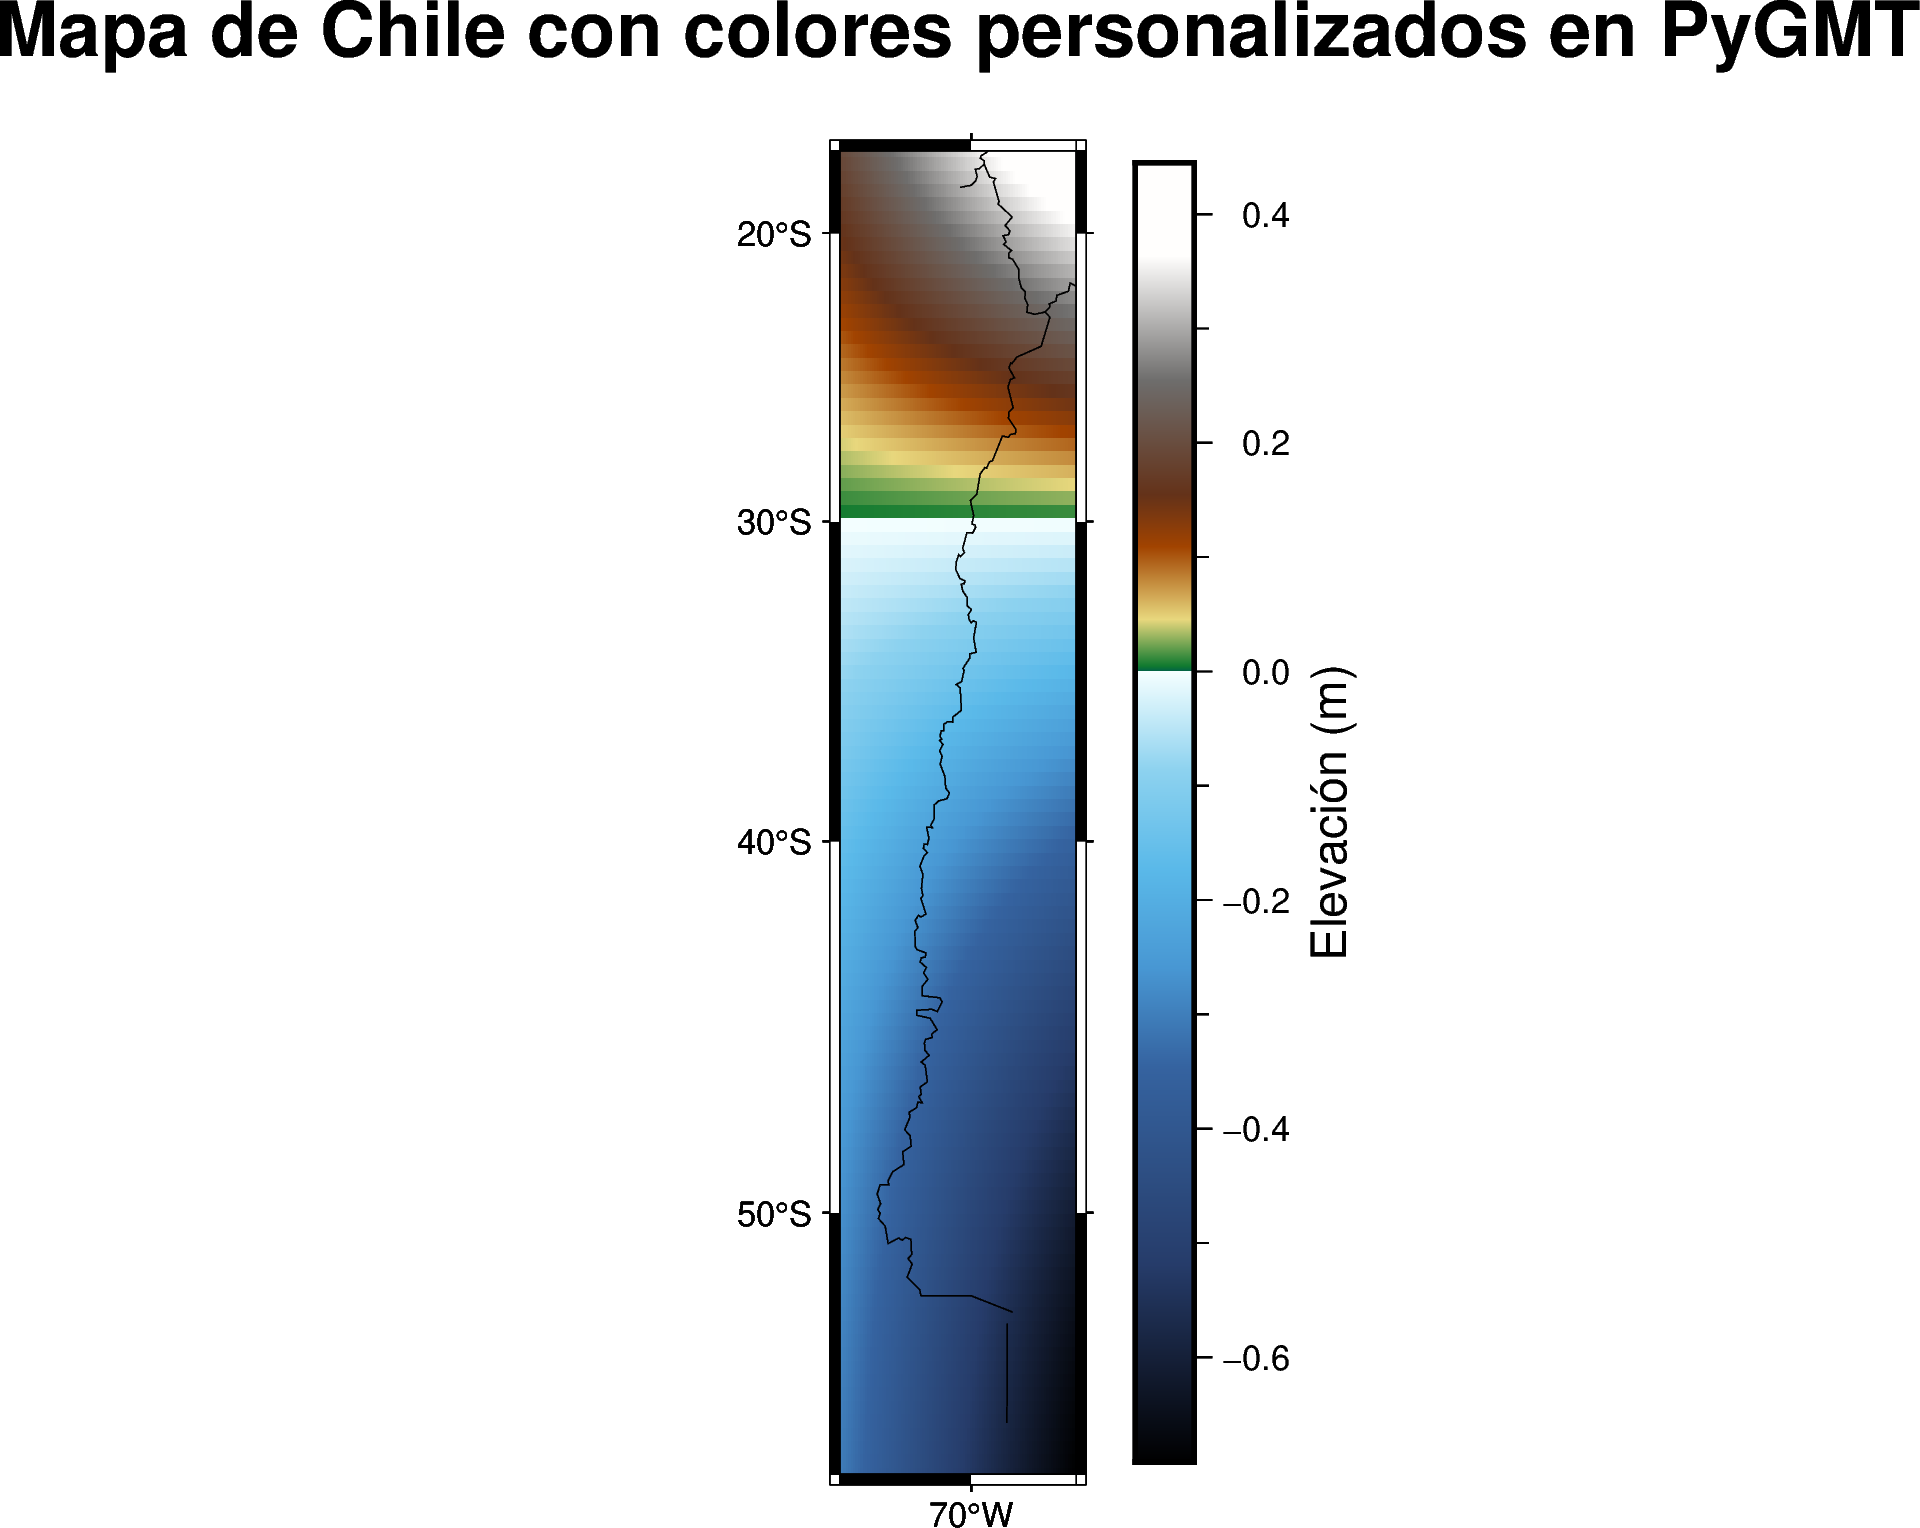

In [57]:
# Generar datos de ejemplo (elevación ficticia)
import xarray as xr
# Generar datos de ejemplo (elevación ficticia)
lon = np.linspace(-75, -66, 100)
lat = np.linspace(-56, -17, 100)
lon, lat = np.meshgrid(lon, lat)
elevacion = np.sin(3 * np.pi * lon / 180) * np.cos(3 * np.pi * lat / 180)

# Crear un DataArray con xarray
elevacion_da = xr.DataArray(np.flip(elevacion), coords=[("lat", np.flip(lat[:, 0])), ("lon", lon[0, :])])

# Crear una figura
fig = pygmt.Figure()

# Dibujar la costa con colores personalizados y bordes

# Dibujar los datos de elevación con grdimage
fig.grdimage(grid=elevacion_da, region=[-75, -66, -56, -17], projection='M2c', cmap='geo')
fig.coast(region=[-75, -66, -56, -17], projection='M2c', borders=[1], frame=True)
# Añadir título
fig.basemap(frame=['a', '+t"Mapa de Chile con colores personalizados en PyGMT"'])
fig.colorbar(frame='af+l"Elevación (m)"', position='JMR+o0.5c/0c+w11c/0.5c')
# Mostrar el mapa
fig.show()

### También es posible realizar con PyGMT mecanismos focales

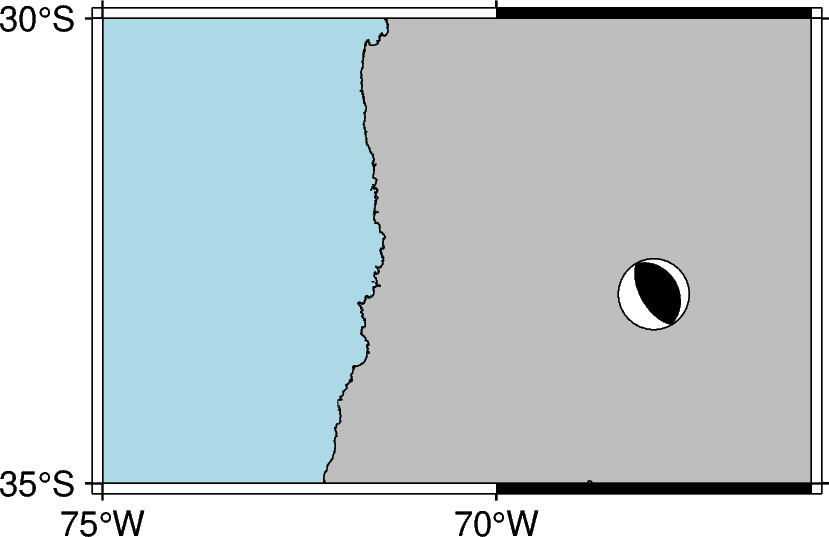

In [63]:
fig = pygmt.Figure()

# generate a basemap near Washington state showing coastlines, land, and water
fig.coast(
    region=[-75, -66, -35, -30],
    projection="M6c",
    land="grey",
    water="lightblue",
    shorelines=True,
    resolution="f",
    frame="a",
)

# store focal mechanisms parameters in a dict
focal_mechanism = dict(strike=330, dip=30, rake=90, magnitude=3)

# pass the focal mechanism data to meca in addition to the scale and event location
fig.meca(focal_mechanism, scale="1c", longitude=-68, latitude=-33, depth=12.0,)

fig.show()

/tmp/ipykernel_167473/3218986067.py:14: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


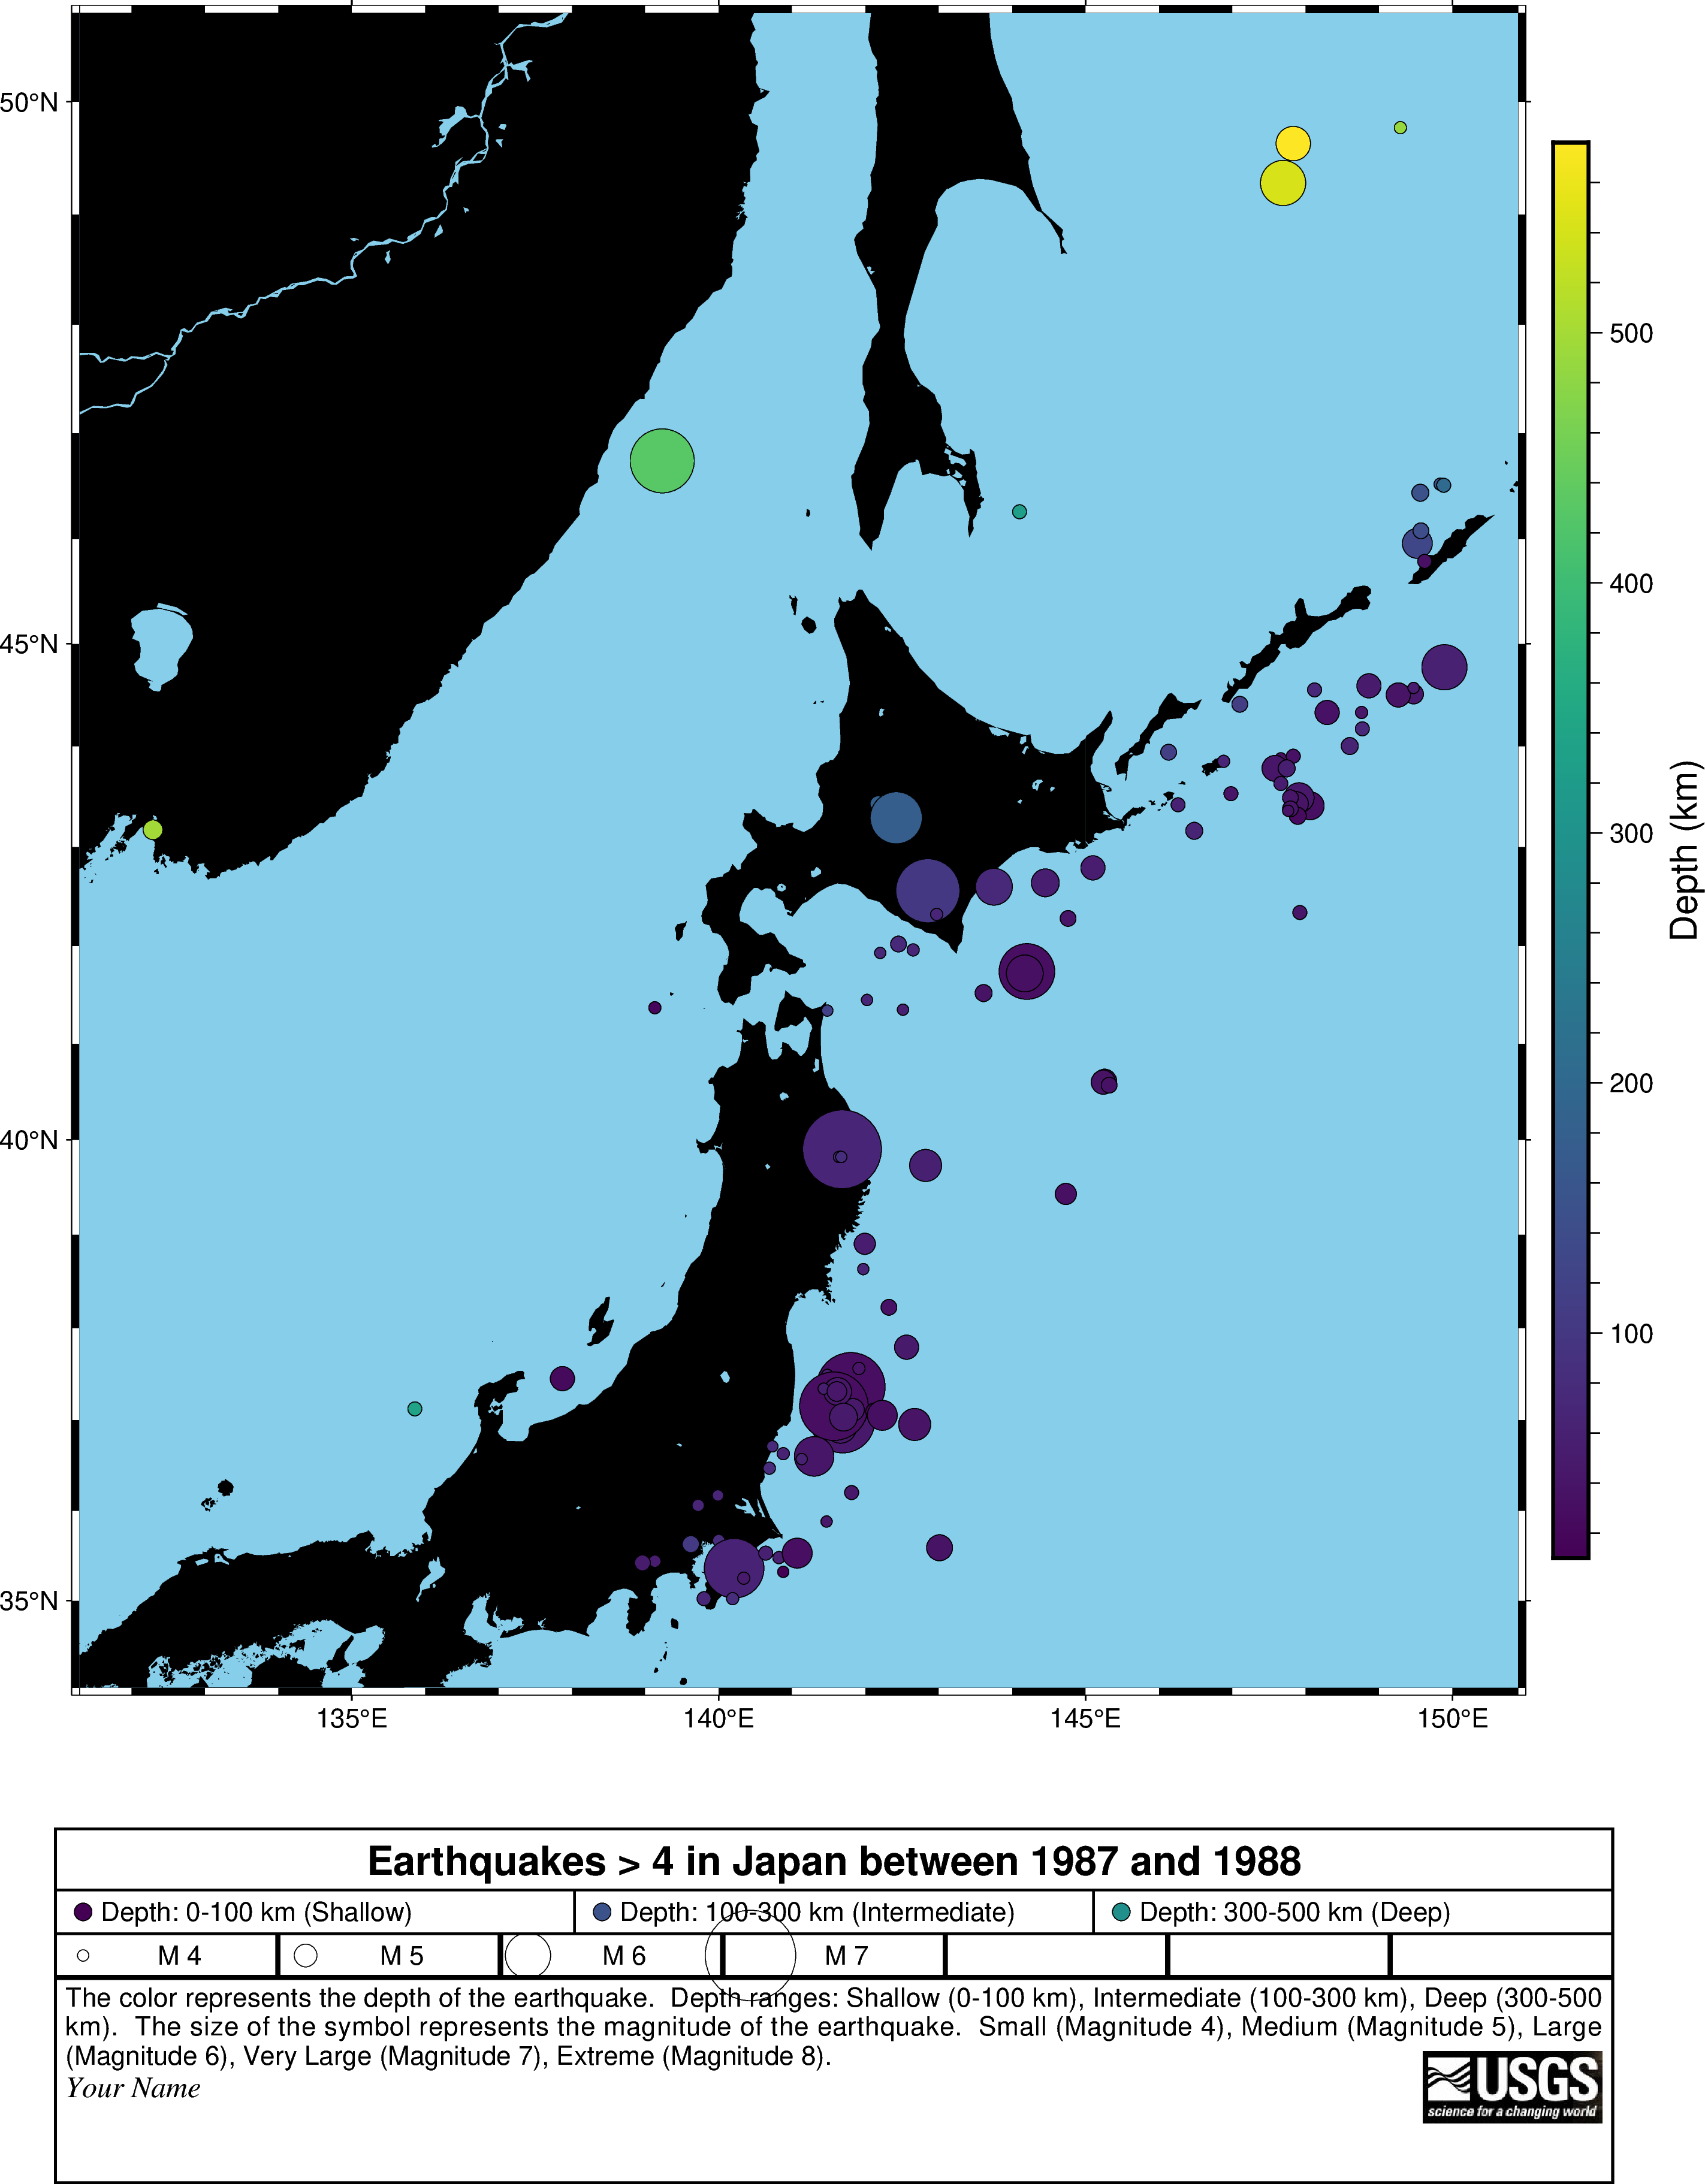

In [107]:
data = pygmt.datasets.load_sample_data(name="japan_quakes")

# Set the region for the plot to be slightly larger than the data bounds.
region = [
    data.longitude.min() - 1,
    data.longitude.max() + 1,
    data.latitude.min() - 1,
    data.latitude.max() + 1,
]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="viridis", series=[data.depth_km.min(), data.depth_km.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    size=0.01 * 2 ** data.magnitude,
    color=data.depth_km,
    cmap=True,
    style="cc",
    pen="black",
)
fig.colorbar(frame='af+l"Depth (km)"',position='JMR+o0.5c/0c+w20c/0.5c')


# Añadir la leyenda a la figura
fig.legend(
    spec='legend.legend',
    position="JBC+o0.5c/2c+w22c/5c",
    box="+gwhite+p1p",
)
fig.show()

## Conclusión

En este notebook, hemos aprendido cómo instalar y usar `cartopy` y `pygmt` en Google Colab para crear mapas básicos y avanzados, incluyendo la representación de Chile con datos de elevación. Estas bibliotecas ofrecen muchas funcionalidades adicionales que puedes explorar en la documentación oficial de [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) y [PyGMT](https://www.pygmt.org/latest/).

In [96]:
[0.01*2**x for x in np.arange(4,8,1)]

[0.16, 0.32, 0.64, 1.28]